In [1]:
from utils.image_utils import plot_XY, gen_index_file
from unet.dataset import SegThorImagesDataset

In [2]:
# if index file doesn't exist, generate and save 
index_file_train = gen_index_file()

In [3]:
index_file_train

'data/train_patient_idx.csv'

In [9]:
# TODO: transform to crop to center 312x312
train_data = SegThorImagesDataset()

seg_iter = iter(train_data)

for _ in range(100):
    X, Y = next(seg_iter)

X, Y = next(seg_iter)
plot_XY(X, Y)

Opening: data/train/Patient_01/Patient_01.nii.gz
Returning slice: 0
Opening: data/train/Patient_01/Patient_01.nii.gz
Returning slice: 1
Opening: data/train/Patient_01/Patient_01.nii.gz
Returning slice: 2
Opening: data/train/Patient_01/Patient_01.nii.gz
Returning slice: 3
Opening: data/train/Patient_01/Patient_01.nii.gz
Returning slice: 4
Opening: data/train/Patient_01/Patient_01.nii.gz
Returning slice: 5
Opening: data/train/Patient_01/Patient_01.nii.gz
Returning slice: 6
Opening: data/train/Patient_01/Patient_01.nii.gz
Returning slice: 7
Opening: data/train/Patient_01/Patient_01.nii.gz
Returning slice: 8
Opening: data/train/Patient_01/Patient_01.nii.gz
Returning slice: 9
Opening: data/train/Patient_01/Patient_01.nii.gz
Returning slice: 10
Opening: data/train/Patient_01/Patient_01.nii.gz
Returning slice: 11
Opening: data/train/Patient_01/Patient_01.nii.gz
Returning slice: 12
Opening: data/train/Patient_01/Patient_01.nii.gz
Returning slice: 13
Opening: data/train/Patient_01/Patient_01.ni

Opening: data/train/Patient_01/Patient_01.nii.gz
torch.Size([512, 512, 229]) torch.Size([512, 512, 229])


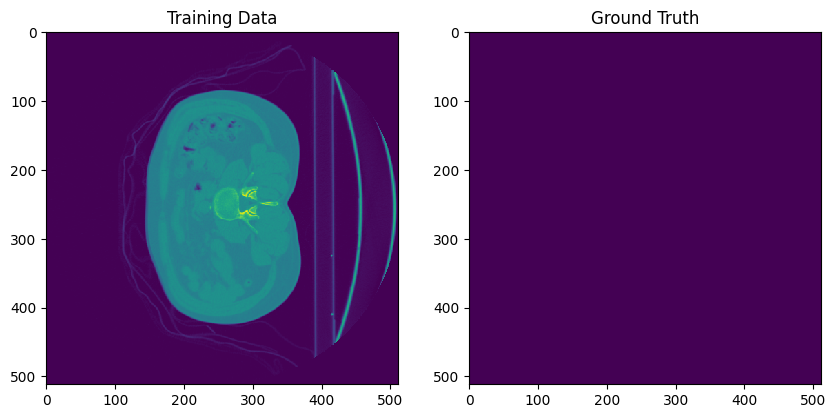

In [4]:
from utils.image_utils import get_sample_data
 
x, y = get_sample_data(dir='train', patient_number=1, slice=0)
print(x.size(), y.size())

idx = 99

plot_XY(x[:, :, idx].unsqueeze(0), y[:, :, idx])

In [6]:
from unet import unet_model
from importlib import reload
reload(unet_model)
import torch 

model = unet_model.UNet(1, 2)

# data = torch.rand((5, 1, 572, 572))
data = X.unsqueeze(0)

temp_ = model(data)

temp_.shape # bottom of U is 1024 feature maps of 24^2b

Input x size: torch.Size([1, 1, 512, 512])
x1 size: torch.Size([1, 64, 508, 508])
x2 size: torch.Size([1, 128, 250, 250])
x3 size: torch.Size([1, 256, 121, 121])
x4 size: torch.Size([1, 512, 56, 56])
x5 size: torch.Size([1, 1024, 24, 24])
x after up1: torch.Size([1, 512, 44, 44])
x after up2: torch.Size([1, 256, 84, 84])
x after up3: torch.Size([1, 128, 164, 164])
x after up4: torch.Size([1, 64, 324, 324])


torch.Size([1, 2, 324, 324])